# Dominoes Game Simulation

In this notebook, we will simulate a series of dominoes games using different strategies. We will then analyze the results to determine which strategy is the most effective.

## Setup

First, we import the necessary libraries and define our constants.

In [ ]:
# adding parent directory to read dominoes package
import sys
sys.path.append('..')

from dominoes.strategies import (
    RandomStrategy,
    LargestPieceStrategy,
    SmallestPieceStrategy,
    AggregateMinimaxStrategy,
)
from itertools import product
from concurrent.futures import ProcessPoolExecutor
import multiprocessing
from simulate_games import simulate_games

NUM_PLAYERS = 4
MAX_VALUE = 9
NUM_PIECES = 12
NUM_GAMES = 100

## Strategy Definitions

Next, we define the strategies that we will be testing.

In [ ]:
strategies = [
    RandomStrategy(),
    LargestPieceStrategy(),
    SmallestPieceStrategy(),
    AggregateMinimaxStrategy(6),
]
strategy_combinations = list(product(strategies, repeat=NUM_PLAYERS))

## Simulation

Now, we run the simulations in parallel.

In [ ]:
num_cores = multiprocessing.cpu_count()
results = {}

# Run simulations in parallel
with ProcessPoolExecutor(max_workers=num_cores) as executor:
    futures = [executor.submit(simulate_games, sc, MAX_VALUE, NUM_PIECES, NUM_GAMES) for sc in strategy_combinations]

    for future in futures:
        strategy_combination, wins, avg_penalty = future.result()
        results[strategy_combination] = (wins, avg_penalty)

## Results

Finally, we analyze the results of our simulations.

### Wins and Penalty by Strategy

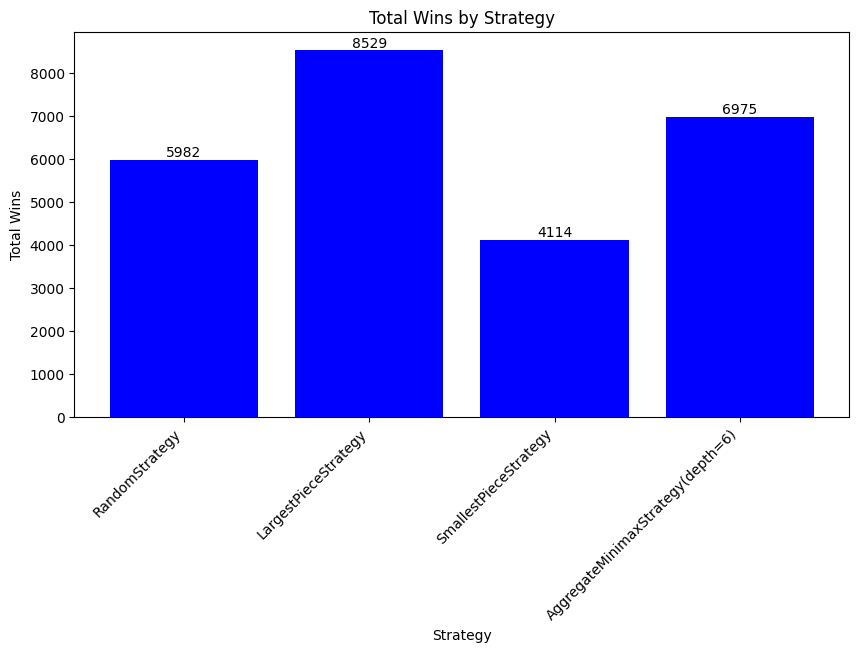

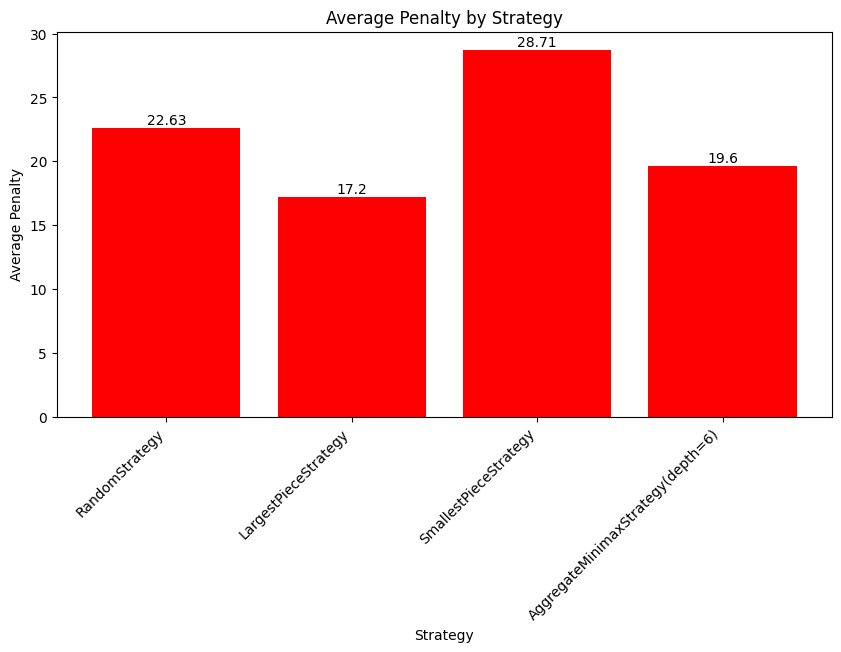

In [28]:
import matplotlib.pyplot as plt

total_wins = [0] * len(strategies)
total_penalties = [0] * len(strategies)

# Create a dictionary to map each strategy to its index for easy lookup
strategy_index_map = {
    str(strategy): index for index, strategy in enumerate(strategies)
}

# Aggregating wins and scores based on strategy
for strategy_combination, (wins, penalties) in results.items():
    for player_index, strategy in enumerate(strategy_combination):
        # Use the strategy as a key to find the corresponding index
        strategy_idx = strategy_index_map[str(strategy)]
        total_wins[strategy_idx] += wins[player_index]
        total_penalties[strategy_idx] += penalties[player_index]

total_penalties = [penalty / len(results) for penalty in total_penalties]

# Display the results
strategy_names = [str(strategy) for strategy in strategies]

plt.figure(figsize=(10, 5))
bars = plt.bar(strategy_names, total_wins, color='b')
plt.xlabel('Strategy')
plt.ylabel('Total Wins')
plt.title('Total Wins by Strategy')
plt.xticks(rotation=45, ha='right')  # Rotate labels

# Display numbers on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.05, int(yval), ha='center', va='bottom')

plt.show()

plt.figure(figsize=(10, 5))
bars = plt.bar(strategy_names, total_penalties, color='r')
plt.xlabel('Strategy')
plt.ylabel('Average Penalty')
plt.title('Average Penalty by Strategy')
plt.xticks(rotation=45, ha='right')  # Rotate labels

# Display numbers on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.05, round(yval, 2), ha='center', va='bottom')

plt.show()

### Wins and Penalty by Player Order

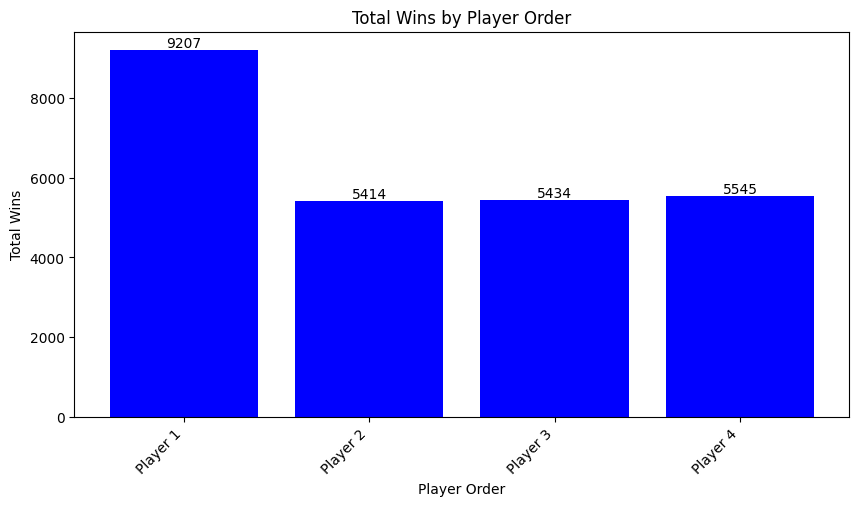

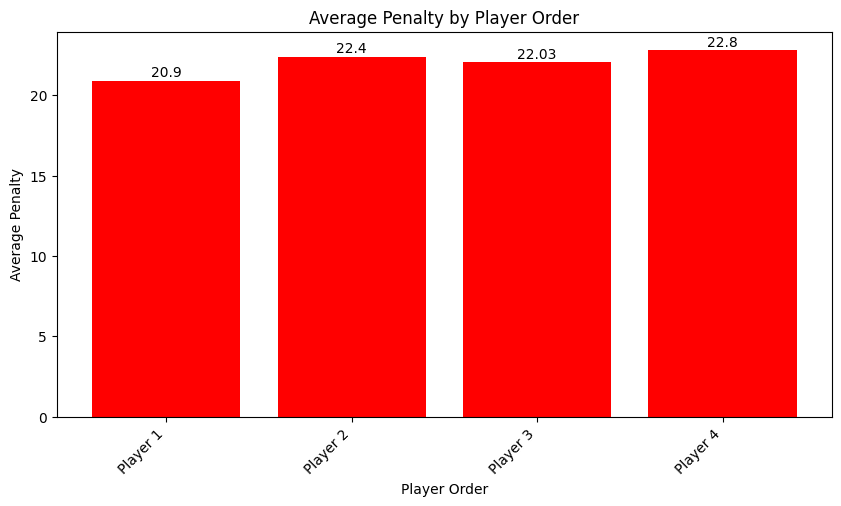

In [27]:
# Cell: Initialize player order stats
player_order_wins = [0] * NUM_PLAYERS
player_order_penalties = [0] * NUM_PLAYERS

# Cell: Update player order stats
for strategy_combination, (wins, penalties) in results.items():
    for player_index, strategy in enumerate(strategy_combination):
        player_order_wins[player_index] += wins[player_index]
        player_order_penalties[player_index] += penalties[player_index]

player_order_penalties = [penalty / len(results) for penalty in player_order_penalties]

# Cell: Display player order stats
player_order = [f'Player {i+1}' for i in range(NUM_PLAYERS)]

# Create a bar graph for total wins by player order
plt.figure(figsize=(10, 5))
bars = plt.bar(player_order, player_order_wins, color='b')
plt.xlabel('Player Order')
plt.ylabel('Total Wins')
plt.title('Total Wins by Player Order')
plt.xticks(rotation=45, ha='right')  # Rotate labels

# Display numbers on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.05, int(yval), ha='center', va='bottom')

plt.show()

# Create a bar graph for average penalties by player order
plt.figure(figsize=(10, 5))
bars = plt.bar(player_order, player_order_penalties, color='r')
plt.xlabel('Player Order')
plt.ylabel('Average Penalty')
plt.title('Average Penalty by Player Order')
plt.xticks(rotation=45, ha='right')  # Rotate labels

# Display numbers on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.05, round(yval, 2), ha='center', va='bottom')

plt.show()